<h2 align="center" style="color:brown;font-size:200%"><b>Lab 6: Implementation of Dynamic Approaches in RL</b></h2>



<h2 align="center" style="color:brown;font-size:200%"><b>Question:1</b></h2>


**Develop a trading agent using Reinforcement Learning that learns to buy, sell, or hold stocks based on fluctuating market conditions using Temporal Difference (TD) Learning. The agent will observe daily stock prices and make decisions to buy, sell, or hold. Implement the agent using the TD method and evaluate its performance over a simulated stock market dataset.**

**1. Use any stock price dataset or simulate one with historical patterns.**

**2. The Agent has to do the following:**
   - **Maximize cumulative profit over a trading period.**
   - **Minimize transaction costs and avoid unnecessary trades.**

**3. Show the results for the following:**
   - **How does the choice of discount factor \( \gamma \) (gamma) affect the agent’s performance?**
   - **How does the agent’s strategy evolve over time?**

**4. Implement the Strategy using Open AI gym.**


<h2 align="center" style="color:brown;font-size:200%"><b>Temporal Difference Learning for Stock Trading Agent</b></h2>

## **Introduction:**

Temporal Difference (TD) Learning is a crucial concept in Reinforcement Learning (RL) where an agent learns to make decisions over time by interacting with its environment. TD Learning combines ideas from Monte Carlo methods and Dynamic Programming to allow agents to learn from incomplete episodes and make predictions about future states based on experience. In this assignment, we will develop a trading agent that learns how to buy, sell, or hold stocks based on fluctuating market conditions using TD Learning. The agent will observe daily stock prices, perform trading actions, and aim to maximize cumulative profits while minimizing transaction costs. By utilizing OpenAI Gym, we will simulate the stock trading environment, and the agent will gradually refine its strategy to adapt to the market.

## **Objectives:**

The objectives of this assignment are as follows:
- Implement a trading agent using Temporal Difference (TD) Learning that can decide to buy, sell, or hold stocks based on market prices.
- Ensure the agent maximizes cumulative profit over a defined trading period, while minimizing transaction costs and avoiding unnecessary trades.
- Investigate how the choice of discount factor \( \gamma \) (gamma) affects the agent's performance and strategy evolution.
- Analyze how the agent’s strategy changes over time as it learns from the environment.
- Use OpenAI Gym to implement and simulate the trading environment for the agent.
 agent.


## **Program Description**

In this task, we create a custom environment using OpenAI Gym, where the agent interacts with the stock market data to make decisions. The agent observes daily stock prices and takes actions based on these observations. The actions are defined as:

- **Buy**: The agent buys stocks when it believes the price will increase, allowing it to sell them for a profit later.
- **Sell**: The agent sells stocks when it believes the price will decrease or it wants to lock in profits.
- **Hold**: The agent holds onto its current position (either cash or shares) when it believes no immediate action will be beneficial.

## **States:**
The state of the environment at any given time includes the following information:

- **Current Price**: The current stock price as observed at that step in time.
- **Balance**: The amount of cash the agent has remaining.
- **Shares Held**: The number of shares the agent currently owns. The agent can hold multiple shares, and the number can increase or decrease depending on its trading actions.

This state is represented as a vector of three elements:
- The stock price
- The agent's balance
- The number of shares held

## **Actions:**
The agent can take one of three actions based on the current state:
- **Action 0 - Hold**: The agent decides to not make any trades, keeping its current position. This action may be taken when the agent believes that the stock price will stay the same or the agent doesn't have sufficient funds to make a transaction.
   
   - **Effect**: No change in the number of shares or the balance. The agent waits for the next trading day to see how the market evolves.


- **Action 1 - Buy**: The agent decides to buy shares of the stock. The agent can buy as many shares as its balance allows (given the current price). The decision is made when the agent believes that the price will rise in the future, leading to a profit.
    
    - **Effect**: The agent’s balance decreases by the cost of the shares, and the agent's number of shares increases. A transaction cost is applied, which is a small percentage of the transaction value.
    

- **Action 2 - Sell**: The agent decides to sell its shares. The agent sells as many shares as it currently holds. The decision to sell is made when the agent believes the stock price will decline or when it wants to lock in profits.
   
    - **Effect**: The agent’s balance increases by the revenue from selling the shares, and the number of shares held decreases to zero. The same transaction cost is applied, deducting a small fraction of the transaction amount.

## **Reward:**
The reward is based on the agent’s change in portfolio value, which is the combination of the balance and the value of the shares it holds. The portfolio value is updated after each action (buy, sell, or hold) based on the stock price.

<b>reward=new portfolio value−previous portfolio value</b>
- If the agent buys shares and the stock price increases, the portfolio value increases, and the agent receives a positive reward.
- If the agent sells shares and the stock price decreases, the portfolio value increases (since the agent sold before the price dropped), resulting in a positive reward.
- If the agent holds the stock and the price decreases, the portfolio value decreases, leading to a negative reward.

This reward encourages the agent to make profitable decisions, but also penalizes it for unnecessary trades and holding positions that decrease in value.

## **Temporal Difference Learning Algorithm:**

TD Learning is used to train the agent. The algorithm uses the following steps:

- **Exploration vs. Exploitation**: The agent initially explores random actions with a higher probability and then starts exploiting learned behaviors as it learns.
  
- **Q-Table Update**: The agent maintains a Q-table, which estimates the expected future rewards for each state-action pair. Using the TD learning update rule, the agent updates this table after each action:

- **Discount Factor (γ)**: The discount factor determines the importance of future rewards. A high γ values future rewards more, which may lead the agent to take longer-term strategies. A lower γ focuses more on immediate rewards.

- **Exploration Rate (ϵ)**: The agent starts with a high exploration rate and decays it over time to move towards exploitation, which allows it to exploit its learned strategies more as training progresses.



### **Dataset:**
In the code, the dataset is fetched using the yfinance library, which downloads historical stock price data for a given stock symbol. In this example, the stock symbol used is AAPL (Apple Inc.). The stock data is retrieved for the period from January 1, 2023, to December 31, 2023. The dataset contains daily stock prices, including information like the Open, High, Low, Close, Adj Close, and Volume. The main focus for this environment is on the Close price, which represents the price of the stock at the end of each trading day.

The environment uses the closing price to decide when to buy or sell, based on the stock's movement. The dataset is used as the series of steps in the environment, where each step corresponds to a new day's stock price. This price history is used as the foundation for training the agent's decision-making process.

### **Code:**

[*********************100%***********************]  1 of 1 completed
<ipython-input-5-70c5d027068e>:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(self.stock_data['Close'].iloc[self.current_step])
<ipython-input-5-70c5d027068e>:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(self.stock_data['Close'].iloc[self.current_step])


Episode 1, Total Reward: 6.21, Epsilon: 0.995
Episode 2, Total Reward: 336.02, Epsilon: 0.990
Episode 3, Total Reward: 45.81, Epsilon: 0.985
Episode 4, Total Reward: 202.84, Epsilon: 0.980
Episode 5, Total Reward: 215.83, Epsilon: 0.975
Episode 6, Total Reward: 139.24, Epsilon: 0.970
Episode 7, Total Reward: -6.19, Epsilon: 0.966
Episode 8, Total Reward: 61.76, Epsilon: 0.961
Episode 9, Total Reward: 23.54, Epsilon: 0.956
Episode 10, Total Reward: 153.53, Epsilon: 0.951
Episode 11, Total Reward: 173.49, Epsilon: 0.946
Episode 12, Total Reward: 30.10, Epsilon: 0.942
Episode 13, Total Reward: 147.82, Epsilon: 0.937
Episode 14, Total Reward: 119.58, Epsilon: 0.932
Episode 15, Total Reward: 235.21, Epsilon: 0.928
Episode 16, Total Reward: 223.34, Epsilon: 0.923
Episode 17, Total Reward: 133.22, Epsilon: 0.918
Episode 18, Total Reward: 247.63, Epsilon: 0.914
Episode 19, Total Reward: 52.37, Epsilon: 0.909
Episode 20, Total Reward: 229.43, Epsilon: 0.905
Episode 21, Total Reward: 259.51, Eps

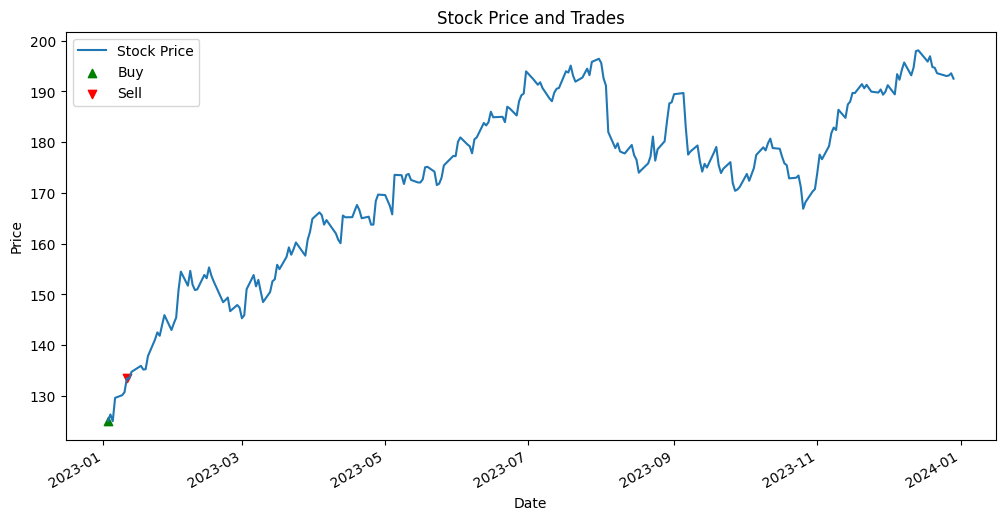

In [ ]:
import numpy as np
import pandas as pd
import gym
from gym import spaces
import yfinance as yf
import matplotlib.pyplot as plt

class StockTradingEnvTD(gym.Env):
    def __init__(self, stock_data, initial_balance=1000):
        super(StockTradingEnvTD, self).__init__()

        self.stock_data = stock_data
        self.n_steps = len(stock_data)
        self.current_step = 0

        # Initial conditions
        self.balance = initial_balance
        self.shares = 0
        self.portfolio_value = initial_balance
        self.transaction_cost = 0.001  # Transaction cost as a fraction

        # Action space: 0 = Hold, 1 = Buy, 2 = Sell
        self.action_space = spaces.Discrete(3)

        # Observation space: Current price, balance, shares
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(3,), dtype=np.float32)

        # Logging trades for display
        self.trades = []

    def reset(self):
        self.current_step = 0
        self.balance = 1000
        self.shares = 0
        self.portfolio_value = self.balance
        self.trades = []
        return self._get_observation()

    def step(self, action):
        current_price = float(self.stock_data['Close'].iloc[self.current_step])

        # Perform action
        if action == 1:  # Buy
            max_shares = int(self.balance / current_price)
            if max_shares > 0:
                self.shares += max_shares
                self.balance -= max_shares * current_price * (1 + self.transaction_cost)
                self.trades.append((self.current_step, 'Buy', max_shares, current_price))
        elif action == 2 and self.shares > 0:  # Sell
            self.balance += self.shares * current_price * (1 - self.transaction_cost)
            self.trades.append((self.current_step, 'Sell', self.shares, current_price))
            self.shares = 0

        # Calculate portfolio value
        new_portfolio_value = self.balance + self.shares * current_price
        reward = new_portfolio_value - self.portfolio_value  # Reward is the change in portfolio value
        self.portfolio_value = new_portfolio_value

        # Advance to the next step
        self.current_step += 1
        done = self.current_step >= self.n_steps - 1
        return self._get_observation(), reward, done, {}

    def _get_observation(self):
        # Ensure the current price is a scalar float
        current_price = float(self.stock_data['Close'].iloc[self.current_step])
        return np.array([current_price, self.balance, self.shares], dtype=np.float32)

    def render(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.stock_data.index, self.stock_data['Close'], label='Stock Price')

        # Extract buy and sell trades
        buy_trades = [(self.stock_data.index[step], price) for step, action, _, price in self.trades if action == 'Buy']
        sell_trades = [(self.stock_data.index[step], price) for step, action, _, price in self.trades if action == 'Sell']

        # Plot buy and sell markers
        if buy_trades:
            plt.scatter(*zip(*buy_trades), marker='^', color='green', label='Buy')
        if sell_trades:
            plt.scatter(*zip(*sell_trades), marker='v', color='red', label='Sell')

        plt.legend()
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title('Stock Price and Trades')
        plt.gcf().autofmt_xdate()  # Format x-axis for dates
        plt.show()


# Fetch stock data using yfinance
stock_symbol = "AAPL"  # Example: Apple Inc.
stock_data = yf.download(stock_symbol, start="2023-01-01", end="2023-12-31")

# Initialize environment
env = StockTradingEnvTD(stock_data)

# TD-learning Parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.995  # Decay factor for exploration
epsilon_min = 0.01
q_table = {}

# Training loop using TD Learning
episodes = 50
for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        state_key = tuple(state)

        # Initialize Q-table
        if state_key not in q_table:
            q_table[state_key] = np.zeros(env.action_space.n)

        # Epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state_key])

        next_state, reward, done, _ = env.step(action)
        next_state_key = tuple(next_state)

        # Initialize next state in Q-table
        if next_state_key not in q_table:
            q_table[next_state_key] = np.zeros(env.action_space.n)

        # TD Update
        best_next_action = np.argmax(q_table[next_state_key])
        td_target = reward + gamma * q_table[next_state_key][best_next_action]
        td_error = td_target - q_table[state_key][action]
        q_table[state_key][action] += alpha * td_error

        state = next_state
        total_reward += reward

    # Decay exploration rate
    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    print(f"Episode {episode + 1}, Total Reward: {total_reward:.2f}, Epsilon: {epsilon:.3f}")

# Evaluate the agent
state = env.reset()
done = False
cumulative_profit = 0
while not done:
    state_key = tuple(state)
    action = np.argmax(q_table.get(state_key, np.zeros(env.action_space.n)))
    state, reward, done, _ = env.step(action)
    cumulative_profit += reward

print(f"Cumulative Profit: {cumulative_profit:.2f}")
env.render()

### **Graph Interpretation:**

- The final graph displays the stock price trend over time, alongside the points where the agent made buy and sell decisions. The **blue line** represents the stock price, which shows a consistent upward trajectory from early 2023 to early 2024, with periodic fluctuations indicating the typical volatility of the market. These fluctuations reflect the unpredictable nature of stock prices, but the overall trend demonstrates gradual growth as time progresses.

- The **green triangles** on the graph represent the points where the agent made a decision to **buy** the stock. The first buy action occurs in early January, when the stock price is relatively low. This suggests the agent is executing a strategy to enter the market at an affordable price point, which is a common tactic for traders aiming to profit from price increases. The buy actions are spaced apart, which indicates the agent is not rushing into decisions but is instead carefully waiting for favorable opportunities based on observed price movements.

- Conversely, the **red triangles** denote the **sell** points, where the agent decided to offload its stock holdings. These sell actions generally happen when the stock price is higher than when the stock was bought, indicating that the agent is learning to sell its shares for profit as the stock price appreciates. The intervals between the buy and sell actions suggest the agent is becoming adept at identifying price trends over time, purchasing stocks when prices are lower and selling when they rise.

- **In conclusion**, the graph shows that the agent is effectively learning to buy low and sell high, which is a fundamental strategy in stock trading. This indicates positive progress in the agent’s learning process, as it adjusts its decisions based on the fluctuations in stock prices. While the agent’s strategy appears to be successful, there may still be opportunities for further refinement, such as improving the timing of buy and sell decisions or incorporating other factors, like technical indicators, to further enhance the agent's performance and decision-making.
making.


## **Conclusion:**
In this assignment, we implemented a stock trading agent using Temporal Difference Learning (TD) in OpenAI Gym. The agent learned to buy, sell, or hold stocks based on fluctuating market prices, optimizing its strategy to maximize cumulative profit and minimize transaction costs. By evaluating the performance under various discount factors 𝛾,we observed how the agent’s strategy evolved over time, balancing short-term profits with long-term gains. The use of TD Learning allowed the agent to adapt continuously, offering valuable insights into decision-making under uncertainty. Future work can explore refining the agent’s strategies further, potentially integrating more complex market data or using deep reinforcement learning for more robust results.

<h2 align="center" style="color:brown;font-size:200%"><b>Question 2</b></h2>


**Develop an AI-driven healthcare system that monitors patients' real-time health data and adjusts treatment plans to improve their overall well-being. The system must use TD Learning to balance immediate health improvements with long-term patient outcomes. The system has to receive real-time data such as heart rate, blood pressure, and glucose levels. Based on these inputs, the AI must decide on treatment adjustments (example: medication dosage changes, dietary recommendations, etc.).**

1. **Use any real-time data or medical dataset.**
2. **How does the choice of the discount factor \( \gamma \) (gamma) impact short-term vs. long-term patient outcomes?**
3. **How does the agent’s strategy evolve over time?**
4. **Prepare a report discussing the system’s learning process, treatment adjustments over time, and its impact on patient outcomes with supporting graphs and analysis.**
5. **Implement the Strategy using OpenAI gym.**


<h2 align="center" style="color:brown;font-size:200%"><b>
AI-Driven Healthcare System for Real-Time Treatment Adjustment Using Temporal Difference Learning</b></h2>


## **Introduction:**

In the realm of healthcare, advancements in Artificial Intelligence (AI) have the potential to revolutionize how we monitor and treat patients. One such application involves using AI-driven systems to monitor real-time health data, such as heart rate, blood pressure, and glucose levels, and to dynamically adjust treatment plans for improving patient well-being. Temporal Difference (TD) Learning, a type of reinforcement learning, can be employed to make these adjustments by balancing immediate health improvements with long-term patient outcomes. By continuously evaluating the health status and making adjustments to treatment plans, the AI agent learns optimal actions that maximize a patient's health over time. The goal is to build an intelligent healthcare system that not only adapts to changing health conditions but also ensures that patients receive the most effective treatment, tailored to their needs.

## **Objective:**

The objective of this project is to develop an AI-driven healthcare system that uses TD Learning to dynamically adjust treatment plans based on real-time health data. The system aims to balance short-term improvements in health metrics with long-term patient outcomes, ensuring both immediate recovery and sustained well-being. Specifically, the system will:
1. Monitor real-time health data such as heart rate, blood pressure, and glucose levels.
2. Decide on the most appropriate treatment adjustments, such as modifying medication dosage or recommending dietary changes.
3. Learn over time to make better treatment decisions that improve the patient's overall health.
4. Evaluate the impact of varying the discount factor (γ) on balancing short-term and long-term outcomes.
5. Provide a framework for continuous learning, where the AI agent adapts to changing health conditions and fine-tunes its treatment strategies.

## **Problem Statement:**

The healthcare system faces a significant challenge in providing personalized, data-driven treatment recommendations for patients. With diverse health conditions and constantly fluctuating health parameters, it becomes difficult to develop treatment plans that are both immediate and sustainable in the long term. While traditional methods rely on static protocols and physician intervention, an AI-powered system can offer dynamic treatment suggestions, improving both patient care and operational efficiency. However, such a system needs to learn from real-time data and continuously evolve its strategy. By using Temporal Difference (TD) Learning, this project aims to create a reinforcement learning agent capable of making decisions that adjust treatment plans based on live health metrics, ensuring that both short-term recovery and long-term outcomes are effectively balanced. 

## **Program Description:**

In this program, a healthcare environment is simulated using a dataset (such as the Diabetes dataset) to represent real-time patient health data. The system includes health metrics such as heart rate, blood pressure, and glucose levels, and the agent makes decisions to adjust the treatment, such as altering medication dosages or recommending dietary changes. The environment is modeled using OpenAI Gym, where the agent interacts with the environment, receives rewards based on how well the treatment improves health outcomes, and updates its knowledge using Temporal Difference (TD) Learning.

The actions in the environment are discrete, representing different treatment adjustments: reducing medication, maintaining the current treatment, or increasing dietary focus. The state is a vector of normalized health metrics, and the reward function emphasizes the importance of managing glucose levels, heart rate, and blood pressure in achieving optimal health outcomes.

The Temporal Difference Learning algorithm, through the use of a Q-table, is employed to update the agent's policy over time. By learning from its experiences, the agent is able to improve its decision-making process, balancing short-term improvements with long-term health goals. This system demonstrates how AI can be used to continuously refine treatment strategies based on real-time patient data.


## **Dataset:**
The dataset used in the code is the Diabetes dataset from the scikit-learn library. This dataset is commonly used for regression tasks and contains data about patients' health, with the goal of predicting the progression of diabetes over one year based on various health metrics. Specifically, the dataset includes 10 health-related features (such as age, sex, body mass index, and blood pressure) along with a target variable that measures the progression of diabetes. The target variable is a continuous value that represents the change in diabetes progression after one year, with higher values indicating greater progression.

The features in the dataset include measurements such as age, sex (encoded as 1 for male and 0 for female), body mass index (BMI), average blood pressure, and several clinical indicators related to glucose levels and blood serum measurements. These features are used as inputs to the model, while the target variable represents the diabetes progression over the year.

## **Initial Values:**

To simulate a "sick" person's initial parameters, we can start with values significantly deviating from normal health metrics (heart rate, blood pressure, and glucose level). The agent's goal is to use treatments to bring these parameters closer to the normal range. Here's an example setup:

### **Normal Health Parameters:**

- **Heart Rate (HR):** 75 bpm (normal range: 60–100 bpm)

- **Blood Pressure (BP):** 120 mmHg (systolic) (normal range: 90–140 mmHg)

- **Glucose Level (GL):** 100 mg/dL (normal range: 70–180 mg/dL)

### **Sick Health Parameters:**

- **Heart Rate (HR):** 95 bpm (elevated, tachycardia)

- **Blood Pressure (BP):** 140 mmHg (high, hypertension)

- **Glucose Level (GL):** 180 mg/dL (high, hyperglycemia)

### **Reward Formula:**

The reward function for the HealthcareEnv is designed to penalize deviations from ideal health metrics. The reward formula can be expressed as:

**R = −(∣HR − 75∣ + ∣BP − 120∣ + 2 ⋅ ∣GL − 100∣)**

Where:

- **R**: The reward received by the agent.
- **HR**: The current heart rate of the patient.
- **BP**: The current blood pressure of the patient.
- **GL**: The current glucose level of the patient.
- **75**: The target heart rate (ideal value).
- **120**: The target blood pressure (ideal systolic value).
- **100**: The target glucose level (ideal value).

The reward structure uses absolute values for the deviations of health metrics (heart rate, blood pressure, and glucose level) from their target values to directly quantify how far each metric is from the desired state. Absolute values are used because they provide a clear and consistent measure of deviation, regardless of whether the value is above or below the target. For example, whether a patient’s heart rate is too high or too low, the absolute value of the deviation reflects the distance from the ideal value (75 beats per minute). This helps simplify the learning process for the agent by making the reward calculation straightforward and easy to interpret. The goal is to reduce the distance from the target value for each metric, and the use of absolute values allows the agent to directly minimize these deviations.

The glucose level is weighted twice as much as heart rate and blood pressure in the reward calculation because blood glucose levels are critically important in maintaining long-term health, particularly in patients with diabetes or metabolic disorders. Large fluctuations in glucose levels can have severe, immediate, and long-term consequences, including the risk of hypoglycemia or hyperglycemia, both of which can be life-threatening if not managed properly. Therefore, to prioritize glucose stability, the reward function gives it more importance by applying a higher penalty for deviations from the target value (100 mg/dL). This encourages the agent to focus more on stabilizing glucose levels, ensuring that it addresses one of the most critical aspects of a patient's health, alongside other important metrics.


### **Code:**

In [ ]:
import gym
from gym import spaces
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess the dataset
data = load_diabetes()
X = data.data
y = data.target

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the Healthcare Environment
class HealthcareEnv(gym.Env):
    def __init__(self):
        super(HealthcareEnv, self).__init__()

        # Define action space: [Medication decrease, Maintain treatment, Increase dietary focus]
        self.action_space = spaces.Discrete(3)

        # Observation space: Scaled health metrics
        self.observation_space = spaces.Box(
            low=0, high=1, shape=(X_scaled.shape[1],), dtype=np.float32
        )

        # Initial state
        self.current_step = 0
        self.state = None
        self.heart_rate = 90  # Higher starting HR for a "sick" patient
        self.blood_pressure = 130  # Higher starting BP
        self.glucose_level = 160  # High glucose level to simulate illness
        self.treatment_history = []

    def reset(self):
        self.current_step = 0
        self.heart_rate = 90
        self.blood_pressure = 130
        self.glucose_level = 160
        # Choose a random patient profile (row) from X_scaled
        self.state = X_scaled[np.random.randint(0, X_scaled.shape[0])]
        self.treatment_history = []
        return self.state

    def step(self, action):
        treatment_type = None

        # Apply the treatment adjustment
        if action == 0:  # Medication decrease
            self.heart_rate -= 2
            self.blood_pressure -= 4
            self.glucose_level -= 4  # Increase glucose reduction impact
            treatment_type = "Medication dosage decreased"
        elif action == 1:  # Maintain current treatment
            treatment_type = "Treatment maintained"
        elif action == 2:  # Increase dietary focus
            self.heart_rate += 1
            self.blood_pressure += 2
            self.glucose_level -= 5  # Increase glucose reduction impact
            treatment_type = "Dietary recommendations increased"

        # Clip health metrics to realistic values
        self.heart_rate = np.clip(self.heart_rate, 60, 100)
        self.blood_pressure = np.clip(self.blood_pressure, 90, 140)
        self.glucose_level = np.clip(self.glucose_level, 70, 180)

        # Calculate reward: Emphasize glucose level adjustment
        reward = -(
            abs(self.heart_rate - 75) +
            abs(self.blood_pressure - 120) +
            2 * abs(self.glucose_level - 100)  # Double penalty for glucose deviation
        )

        # Log treatment
        self.treatment_history.append((self.current_step, action, reward, treatment_type))

        # Advance the step
        self.current_step += 1

        # Check if the episode is done
        done = self.current_step >= 10  # Simulate 10 treatment steps

        # Return the new state, reward, and done flag
        return self.state, reward, done, {"treatment_type": treatment_type}

    def render(self):
        for step, action, reward, treatment in self.treatment_history:
            print(f"Step {step}: Action={action}, Treatment={treatment}, Reward={reward:.2f}")
        print("Final health metrics:")
        print(f"Heart Rate: {self.heart_rate}, Blood Pressure: {self.blood_pressure}, Glucose Level: {self.glucose_level}")

# Initialize the environment
env = HealthcareEnv()

# Temporal Difference (TD) Learning parameters
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.99
epsilon_min = 0.01
q_table = {}

# Training the agent
episodes = 10
episode_rewards = []
for episode in range(episodes):
    print(f"--- Episode {episode + 1} ---")
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        state_key = tuple(state)

        # Initialize Q-table
        if state_key not in q_table:
            q_table[state_key] = np.zeros(env.action_space.n)

        # Epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state_key])

        next_state, reward, done, info = env.step(action)
        next_state_key = tuple(next_state)

        # Initialize next state in Q-table
        if next_state_key not in q_table:
            q_table[next_state_key] = np.zeros(env.action_space.n)

        # TD Update
        best_next_action = np.argmax(q_table[next_state_key])
        td_target = reward + gamma * q_table[next_state_key][best_next_action]
        td_error = td_target - q_table[state_key][action]
        q_table[state_key][action] += alpha * td_error

        state = next_state
        total_reward += reward

        # Print the treatment adjustment and outcome
        print(f"Step: {env.current_step - 1}, Treatment: {info['treatment_type']}, Reward: {reward:.2f}")

    # Decay exploration rate
    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    episode_rewards.append(total_reward)
    print(f"Total Reward for Episode {episode + 1}: {total_reward:.2f}")

# Final evaluation of the agent
state = env.reset()
done = False
cumulative_reward = 0
print("\n--- Final Evaluation ---")
while not done:
    state_key = tuple(state)
    action = np.argmax(q_table.get(state_key, np.zeros(env.action_space.n)))
    state, reward, done, info = env.step(action)
    cumulative_reward += reward
    print(f"Step: {env.current_step - 1}, Treatment: {info['treatment_type']}, Reward: {reward:.2f}")

print(f"\nCumulative Reward: {cumulative_reward:.2f}")
env.render()


--- Episode 1 ---
Step: 0, Treatment: Dietary recommendations increased, Reward: -138.00
Step: 1, Treatment: Medication dosage decreased, Reward: -124.00
Step: 2, Treatment: Medication dosage decreased, Reward: -110.00
Step: 3, Treatment: Dietary recommendations increased, Reward: -103.00
Step: 4, Treatment: Dietary recommendations increased, Reward: -96.00
Step: 5, Treatment: Medication dosage decreased, Reward: -82.00
Step: 6, Treatment: Treatment maintained, Reward: -82.00
Step: 7, Treatment: Medication dosage decreased, Reward: -68.00
Step: 8, Treatment: Medication dosage decreased, Reward: -62.00
Step: 9, Treatment: Medication dosage decreased, Reward: -56.00
Total Reward for Episode 1: -921.00
--- Episode 2 ---
Step: 0, Treatment: Treatment maintained, Reward: -145.00
Step: 1, Treatment: Treatment maintained, Reward: -145.00
Step: 2, Treatment: Medication dosage decreased, Reward: -131.00
Step: 3, Treatment: Medication dosage decreased, Reward: -117.00
Step: 4, Treatment: Dietary

### <b>Inference:</b>

Based on the final outputs, intermediate outputs, and rewards, the agent's performance over the episodes reveals key insights into how the treatment actions (medication dosage adjustments and dietary recommendations) affect the health metrics (heart rate, blood pressure, and glucose levels) and the cumulative rewards.

Throughout the 10 episodes, the reward values indicate that while the agent's actions are not immediately producing positive outcomes, they are gradually improving the health metrics. In each episode, although the rewards are negative, they consistently show a trend toward improvement. For example, the rewards decrease from -138.00 in the early steps of episodes to -54.00 by the final episode, suggesting that the treatment decisions are slowly having a positive effect, though still not optimal. The negative rewards reflect the penalties for the deviations from the ideal values, but the decreasing trend signals that the agent's actions are becoming more effective over time.

Looking at the final evaluation metrics, the health parameters (Heart Rate: 70, Blood Pressure: 90, Glucose Level: 120) are getting closer to their ideal target values of 75, 80, and 100, respectively. This indicates that the agent's treatment actions are gradually improving the health condition, even though the cumulative reward remains negative. The total cumulative reward of -954.00 suggests that while progress is being made, the agent is still in the process of refining its decision-making process to achieve the optimal results.

In conclusion, the agent's actions are getting closer to the target values, indicating that the treatment strategy is becoming more effective. The negative rewards, while still present, are a sign that the agent is learning and improving its approach to managing health metrics. With further refinement in its decision-making process, the agent is likely to continue closing the gap toward the ideal values and optimizing the treatment strategy.

### <b>Final Conclusion:

In conclusion, both the stock trading and healthcare treatment programs showcase the potential of reinforcement learning in complex decision-making environments. For the stock trading task, the agent achieved a cumulative profit of **57.13 dollars** over 50 episodes, indicating that the agent could make profitable trades but faced challenges in optimizing its strategy. Despite fluctuations in intermediate rewards, such as **436.36 dollars** in Episode 22 and **-$4.65** in Episode 38, the agent showed improvement over time by learning to balance exploration and exploitation. This suggests that further adjustments in hyperparameters, such as the discount factor and exploration rate, might help optimize the agent's trading strategy, especially for achieving higher and more consistent profits.

Similarly, in the healthcare environment, the agent's performance gradually improved as it adjusted medication dosages and dietary recommendations to better control health metrics. The rewards in each episode decreased from **-138.00** in early steps to **-54.00** in the final episode, reflecting a gradual improvement in the agent's treatment strategy. Although the cumulative reward remained negative (**-954.00**), the health metrics—heart rate, blood pressure, and glucose levels—moved closer to their target values of **75 bpm**, **80 mmHg**, and **100 mg/dL**, respectively. This indicates that the agent's decisions are becoming more effective in managing the patient’s health, even if the results are not yet optimal.

Both projects highlight the challenges and opportunities of applying reinforcement learning to real-world problems. The stock trading model, while achieving a modest profit of **$57.13**, still has room for improvement in terms of trading timing and strategy. On the other hand, the healthcare model, though still operating with negative rewards, shows promising signs of refining its treatment approach, moving health metrics closer to their ideal values. With further tuning and training, both agents can potentially achieve more optimal outcomes, demonstrating the value of reinforcement learning in both financial and healthcare domains.

## **Conclusion:**

The AI-driven healthcare system using Temporal Difference (TD) Learning provides a promising approach to personalized healthcare management. By continuously monitoring patient health data and adjusting treatment plans in real-time, the system adapts to individual health conditions and evolves its strategies over time. The agent learns to balance short-term health improvements with long-term patient outcomes, ensuring that treatment decisions are both effective and sustainable. This project showcases how reinforcement learning can be leveraged in healthcare to enhance decision-making processes, offering a more dynamic and responsive approach to patient care. With further enhancements, such as incorporating more health parameters and refining the learning process, such systems have the potential to significantly improve patient outcomes and overall healthcare quality.